In [2]:
import numpy as np 
import pandas as pd  
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use(['ggplot'])

Objective: Examine a simplified linear cost function as it pertains to machine learning linear regression

The cost function is an indicator of error measurment in our predictor of best fit line in linear regression.

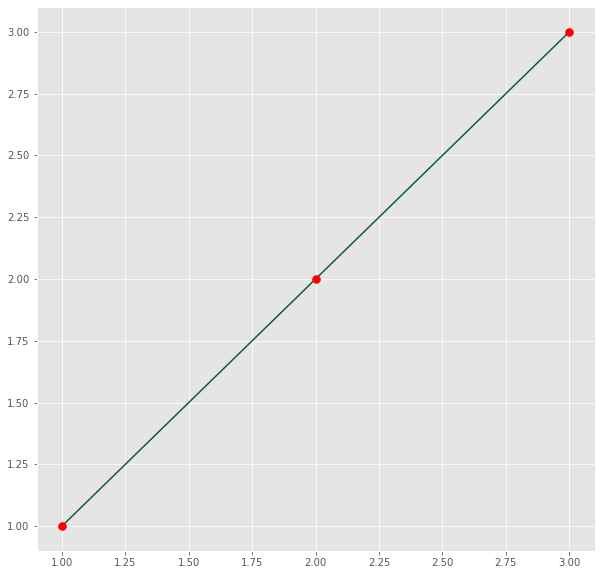

In [12]:
#generate a linear set of points
fig = plt.figure(figsize = [10,10])
plt.plot([1,2,3], [1,2,3], color = "#115B35") 
plt.plot([1,2,3], [1,2,3], '.b', markersize = '15', color = 'red') 
#Here the line has  slope of 1, and forms a perfect correlation with our best fit line, so the cost function should be 0 for
#  0 error between the predicted and actual values. 

Minimize the Cost Function for Linear Regression: $$\huge minimize:J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \sum  (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$
<br>
where the first term in after the = is the predicted output of the linear function, and the y portion is the actual values. We are looking to find the squared sum of all errors, and find the lowest squared error value to give us our best model, line of best fit, and outcome predictor



Hypothesis : $$\Huge h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

For a fixed $$\Huge \theta_{0} = 0$$ then $$\Huge h_{\theta}(x) = \theta_{1}x$$

Indicating that all points tested will go through the origin $$\Huge (0,0)$$

We can then simplify our cost function as follows:

$$\huge minimize:J(\theta_{1}) = \frac{1}{2m} \sum  (\theta_{1}x^{(i)}) - y^{(i)})^{2}$$

note that the cost function now only uses parameter $$\Huge J(\theta_{1})$$

Now we will examine what happens with the cost function for the given theta1 = 1 and theta0 = 0
$$\huge minimize:J(\theta_{1}) = \frac{1}{2m} \sum (\theta_{1}x^{(i)}) - y^{(i)})^{2}$$


$$\huge J(\theta_{1}) = 1 $$ 




$$\huge minimize:J(1) = \frac{1}{2m} \sum  (1x^{(i)}) - y^{(i)})^{2}$$
$$\huge J(1) = \frac{1}{2m} \sum  (1x^{(1)}) - y^{(1)})^{2} = 0^{2} = 0$$
$$\huge J(1) = \frac{1}{2m} \sum  (1x^{(2)}) - y^{(2)})^{2} = 0^{2} = 0$$
$$\huge J(1) = \frac{1}{2m} \sum  (1x^{(3)}) - y^{(3)})^{2} = 0^{2} = 0$$

Testing our linear points we created in the first few cells, the cost function for a linear relationship of perfect correlation is in fact 0. Now we can test this out in python with outside values to see how to minimize (and thus optimize) our slope value theta1 to BEST fit our points

In [13]:
#CREATE HYPOTHESIS FUNCTION
def hyp_fxn(x, theta0 = 0, theta1 = 1): #x is a list
    y = []
    for x in x:
        y.append(theta0 + (theta1*x))
    return y

In [14]:
#CREATE COST FUNCTION
def cost_fxn(x, y, theta1 = 0, theta0 = 0): #x is a list
    cost = 0
    for i,val in enumerate(x):
        cost += (((theta1 * val) + theta0) - y[i])** 2 / (2 * len(x))
    return cost

Minmized cost value:  8.416825233641049e-05
Minimized cost value at J(θ) =  0.9939939939939944


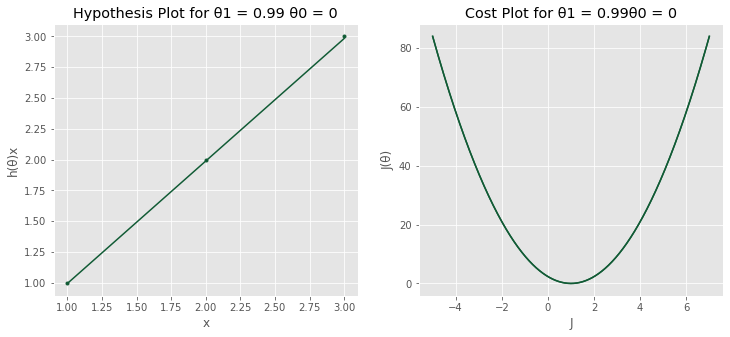

In [31]:
x = [1,2,3] #defining x points in our x, y pair
y = [1,2,3] # defining y points in our x, y pair

cost = [] #create an empty list that will hold the cost function results for each on of our x,y pairs passed to the cost function. This will allow us to determine a minumum value.  
thetas = np.linspace(-5,7, 1000) #test a high number of theta1 values to best approximate the ideal slope value. 

for theta in thetas:
    cost.append(cost_fxn(x, y, theta)) #pass our theta1 slope values to the cost function, resulting in a series of values for which we can take the minimum cost (i.e. lowest error)

min_theta = cost.index(min(cost))  #determine the index at which the error value is the lower. This will be used to determine which theta gives us this value

plt.rcParams['figure.figsize'] = [12, 5]   
plt.subplot(1,2,1)
plt.title('Hypothesis Plot for \u03B81 = ' + str(round(thetas[min_theta],2)) + ' \u03B80 = 0')
plt.xlabel('x')
plt.ylabel('h(\u03B8)x')
plt.plot(x, hyp_fxn(x, theta1 = thetas[min_theta]), color = "#115B35")
plt.plot(x,y, '.b', color = "#115B35")
plt.subplot(1, 2, 2)
plt.title('Cost Plot for \u03B81 = ' + str(round(thetas[min_theta],2)) +  '\u03B80 = 0')
plt.xlabel('J')
plt.ylabel('J(\u03B8)')
plt.plot(thetas, cost, color = "#115B35")
plt.plot(thetas, cost, color = "#115B35")
plt.plot()
print("Minmized cost value: ",  min(cost))
print("Minimized cost value at J(\u03B8) = ", thetas[min_theta]) #index thetas to determine which theta gives us our minimized cost function result

We can see that our minimized cost value comes at 1, and this slope of 1 shows a perfect correlation in the plot on the left.
But what about if we include points that don't have the perfect planned correlation of 1, 2 and 3?

Minmized cost value:  30.105295378022657
Minimized cost value at J(θ) =  0.8484848484848486


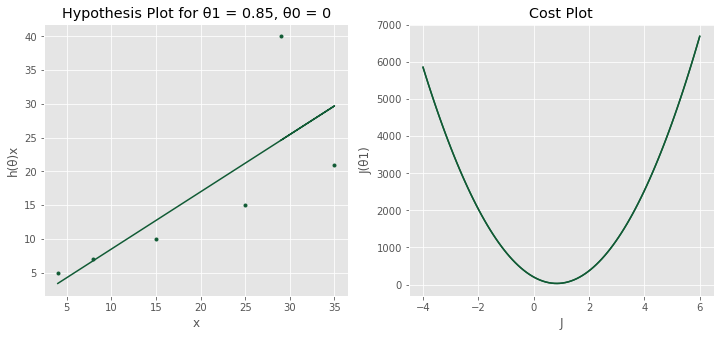

In [29]:
x = [4, 8, 15, 25, 35, 29]
y = [5, 7, 10, 15, 21, 40]

cost = []
thetas = np.linspace(-4,6, 100)
for theta in thetas:
    cost.append(cost_fxn(x, y, theta1 = theta))

min_theta = cost.index(min(cost))  

plt.rcParams['figure.figsize'] = [12,5]   
plt.subplot(1,2,1)
plt.title('Hypothesis Plot for \u03B81 = ' + str(round(thetas[min_theta],ndigits = 2)) +  ', ' + '\u03B80 = 0')
plt.xlabel('x')
plt.ylabel('h(\u03B8)x')
plt.plot(x, hyp_fxn(x, theta1 = thetas[min_theta]), color = "#115B35")
plt.plot(x,y, '.b', color = "#115B35")
plt.subplot(1, 2, 2)
plt.title('Cost Plot')
plt.xlabel('J')
plt.ylabel('J(\u03B81)')
plt.plot(thetas, cost, color = "#115B35")
plt.plot(thetas, cost, color = "#115B35")
plt.plot()
print("Minmized cost value: ",  min(cost))
print("Minimized cost value at J(\u03B8) = ", thetas[min_theta])

The above graphs indicate that for our given (x,y) point pairs, our minimized cost function is 30.2 (measure of error) and this minimized amount of error occurs when the slope theta1 is equal to ~0.86

Minmized cost value:  69.9477094174064
Minimized cost value at J(θ0) =  16.41414141414141


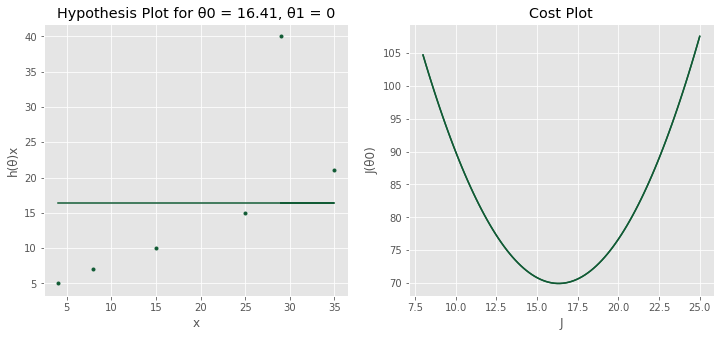

In [24]:
#if we hold the theta1 value constant at 0 and select for the theta0, well find the same parabolic shape.  
x = [4, 8, 15, 25, 35, 29]
y = [5, 7, 10, 15, 21, 40]

cost = []
thetas = np.linspace(8,25, 100)
for theta in thetas:
    cost.append(cost_fxn(x, y, theta0 = theta, theta1 = 0))

min_theta = cost.index(min(cost))  

plt.rcParams['figure.figsize'] = [12, 5]   
plt.subplot(1,2,1)
plt.title('Hypothesis Plot for \u03B80 = ' + str(round(thetas[min_theta],ndigits = 2)) +  ', ' + '\u03B81 = 0')
plt.xlabel('x')
plt.ylabel('h(\u03B8)x')
plt.plot(x, hyp_fxn(x, theta0 = thetas[min_theta], theta1 = 0), color = "#115B35")
plt.plot(x,y, '.b', color = "#115B35")
plt.subplot(1, 2, 2)
plt.title('Cost Plot')
plt.xlabel('J')
plt.ylabel('J(\u03B80)')
plt.plot(thetas, cost, color = "#115B35")
plt.plot(thetas, cost, color = "#115B35")
plt.plot()
print("Minmized cost value: ",  min(cost))
print("Minimized cost value at J(\u03B80) = ", thetas[min_theta])


We can graphically estimate the lowest point of the cost function by visually inspecting the parabola for J.  However, in order to determine the true optimal output, we can apply gradient descent, an algorithm used to iterate through values and converge on a local minimum mathematically.  